In [104]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import folium

In [105]:
df_raw = pd.read_csv('dataset/zomato.csv')

## Limpando Dados

In [106]:
# Criando Funções:

COUNTRIES = {
1: "India",
14: "Australia",
30: "Brazil",
37: "Canada",
94: "Indonesia",
148: "New Zeland",
162: "Philippines",
166: "Qatar",
184: "Singapure",
189: "South Africa",
191: "Sri Lanka",
208: "Turkey",
214: "United Arab Emirates",
215: "England",
216: "United States of America",
}

def Country_Name(country_id):
    return COUNTRIES[country_id]


# -----------------------------------------------


def create_price_tye(price_range):
    if price_range == 1:
        return "cheap"
    elif price_range == 2:
        return "normal"
    elif price_range == 3:
        return "expensive"
    else:
        return "gourmet"
    
    
# -----------------------------------------------

COLORS = {
"3F7E00": "darkgreen",
"5BA829": "green",
"9ACD32": "lightgreen",
"CDD614": "orange",
"FFBA00": "red",
"CBCBC8": "darkred",
"FF7800": "darkred",
}
def color_name(color_code):
    return COLORS[color_code]

# -----------------------------------------------

def rename_columns(dataframe):
    df = dataframe.copy()
    title = lambda x: inflection.titleize(x)
    snakecase = lambda x: inflection.underscore(x)
    spaces = lambda x: x.replace(" ", "")
    cols_old = list(df1.columns)
    cols_old = list(map(title, cols_old))
    cols_old = list(map(spaces, cols_old))
    cols_new = list(map(snakecase, cols_old))
    df1.columns = cols_new
    return df

In [107]:
df = df_raw.copy()

# Removendo linhas 'NaN'

df = df.dropna(subset=['Restaurant ID'])
df = df.dropna(subset=['Restaurant Name'])
df = df.dropna(subset=['Cuisines'])
df = df.dropna(subset=['Country Code'])
df = df.dropna(subset=['Address'])
df = df.dropna(subset=['Locality'])
df = df.dropna(subset=['Locality Verbose'])
df = df.dropna(subset=['Longitude'])
df = df.dropna(subset=['Average Cost for two'])
df = df.dropna(subset=['Has Table booking'])
df = df.dropna(subset=['Has Online delivery'])
df = df.dropna(subset=['Price range'])
df = df.dropna(subset=['Aggregate rating'])
df = df.dropna(subset=['Rating color'])
df = df.dropna(subset=['Votes'])
df = df.dropna(subset=['City'])
#df = df.dropna(subset=['City'])

df = df.dropna( )

# Removendo linhas duplicadas
df = df.drop_duplicates()

df = df.drop(columns = ['Switch to order menu'], axis=1)

# Define categorias de preço de acordo com o range
df['Price range'] = df['Price range'].apply(create_price_tye)

# Define o padrão de cores das avaliações
df['Rating color'] = df['Rating color'].apply(color_name)

# --------------------------------------------------------

df['Country Name'] = df['Country Code'].map(Country_Name)
# Definisdo os restaurantes po apenas um tipo de culinaria
df["Cuisines"] = df.loc[:, "Cuisines"].astype(str).apply(lambda x: x.split(",")[0])

# df.info() #valores nulos
#print(df.isnull())
# print(df.isna())

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6929 entries, 0 to 7526
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         6929 non-null   int64  
 1   Restaurant Name       6929 non-null   object 
 2   Country Code          6929 non-null   int64  
 3   City                  6929 non-null   object 
 4   Address               6929 non-null   object 
 5   Locality              6929 non-null   object 
 6   Locality Verbose      6929 non-null   object 
 7   Longitude             6929 non-null   float64
 8   Latitude              6929 non-null   float64
 9   Cuisines              6929 non-null   object 
 10  Average Cost for two  6929 non-null   int64  
 11  Currency              6929 non-null   object 
 12  Has Table booking     6929 non-null   int64  
 13  Has Online delivery   6929 non-null   int64  
 14  Is delivering now     6929 non-null   int64  
 15  Price range          

## Visão Cidade

In [109]:
df1 = df.copy()
df1 = df1.dropna(subset=['Country Name'])

In [110]:
# df1 = df1.drop('index', axis=1) # Remove index

### 1. Qual o nome da cidade que possui mais restaurantes registrados?

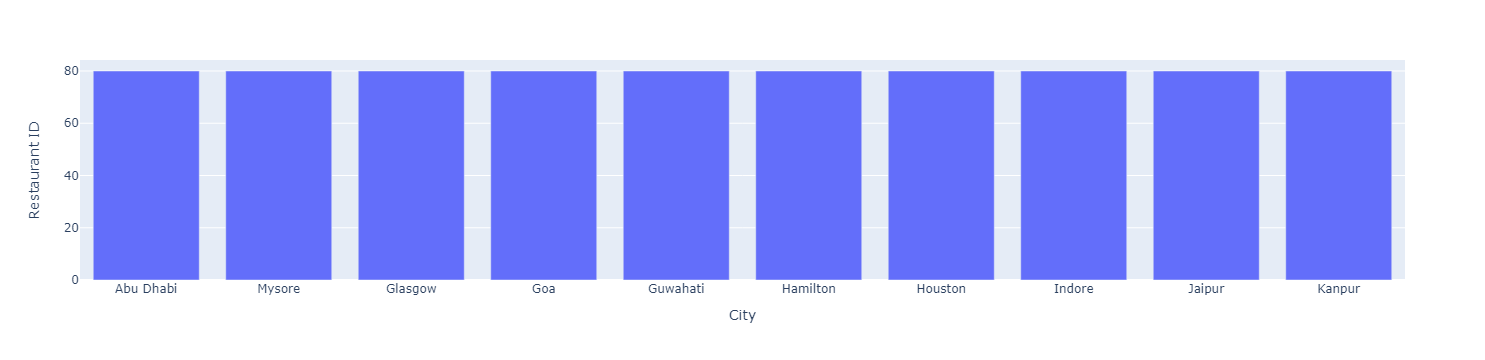

In [111]:
df2 = df1.loc[:, ['Restaurant ID', 'City']].groupby('City').count().sort_values(['Restaurant ID'],ascending = False)[0:10].reset_index()
px.bar(df2, x = 'City', y = 'Restaurant ID')

### 2. Qual o nome da cidade que possui mais restaurantes com nota média acima de 4?

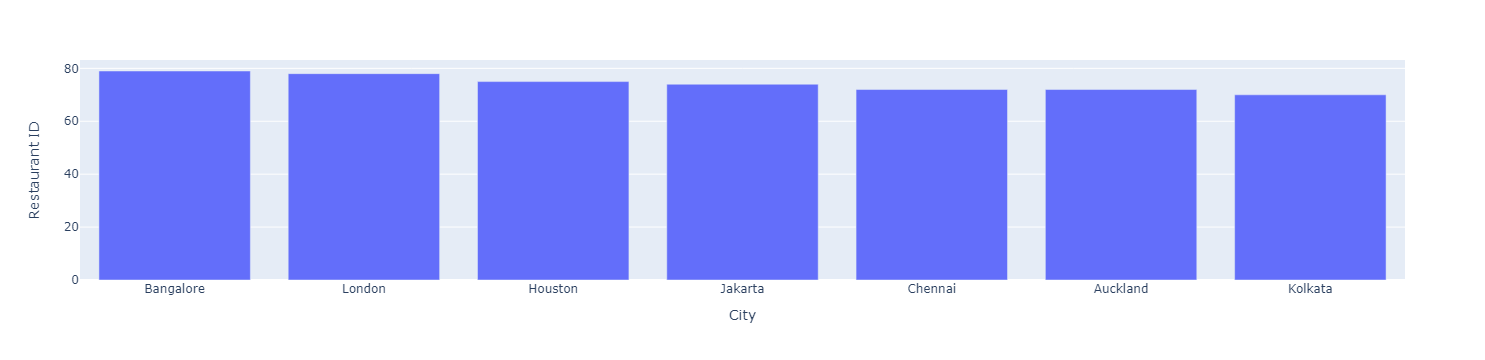

In [112]:
df2 = df1.loc[df1['Aggregate rating'] > 4, ['Restaurant ID', 'City']].groupby('City').count().sort_values(['Restaurant ID'],ascending = False)[0:7].reset_index()
px.bar(df2, x = 'City', y = 'Restaurant ID')

### 3. Qual o nome da cidade que possui mais restaurantes com nota média abaixo de 2.5?

In [1]:
df2 = df1.loc[df1['Aggregate rating'] < 2.5, ['Restaurant ID', 'City']].groupby('City').count().sort_values(['Restaurant ID'],ascending = False)[0:7].reset_index()
px.bar(df2, x = 'City', y = 'Restaurant ID')

NameError: name 'df1' is not defined

### 4. Qual o nome da cidade que possui o maior valor médio de um prato para dois?

In [114]:
valor = df1.loc[:, ['Average Cost for two', 'City']].groupby('City').mean().sort_values(['Average Cost for two'],ascending = False).reset_index().iloc[0, 0]
print(f'O nome da cidade que possui o maior valor médio de um prato para dois é {valor}')

O nome da cidade que possui o maior valor médio de um prato para dois é Adelaide


### 5. Qual o nome da cidade que possui a maior quantidade de tipos de culinária distintas?

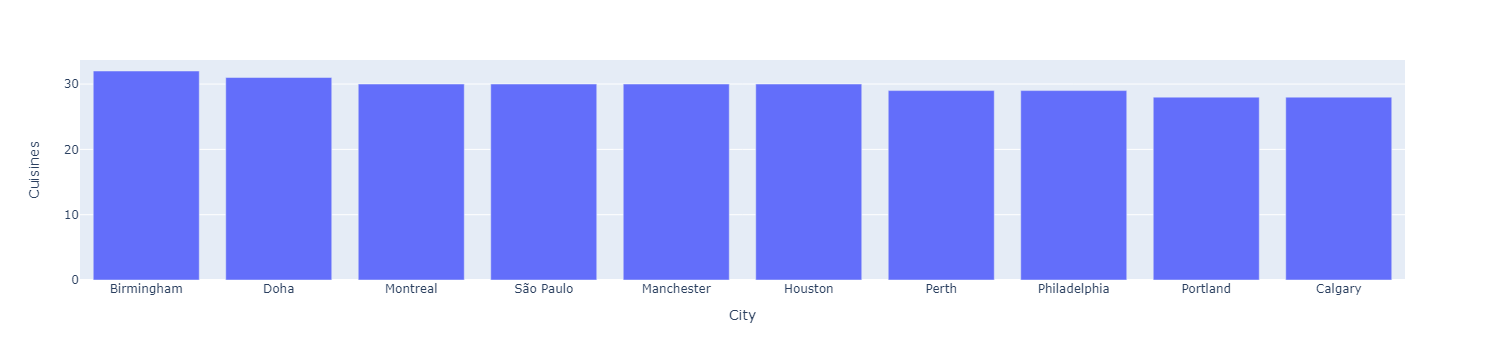

In [115]:
df2 = df1.loc[:, ['Cuisines', 'City']].groupby('City').nunique().sort_values(['Cuisines'],ascending = False)[0:10].reset_index()
px.bar(df2, x = 'City', y = 'Cuisines')

### 6. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem reservas?

In [116]:
valor = df1.loc[df1['Has Table booking'] == 1, ['Restaurant ID', 'City']].groupby('City').count().sort_values(['Restaurant ID'], ascending = False).reset_index().iloc[0, 0]
print(f'O nome da cidade que possui a maior quantidade de restaurantes que fazem reservas é {valor}')

O nome da cidade que possui a maior quantidade de restaurantes que fazem reservas é Bangalore


### 7. Qual o nome da cidade que possui a maior quantidade de restaurantes que fazem entregas?

In [117]:
valor = df1.loc[df1['Is delivering now'] == 1, ['Restaurant ID', 'City']].groupby('City').count().sort_values(['Restaurant ID'], ascending = False).reset_index().iloc[0, 0]
print(f'O nome da cidade que possui a maior quantidade de restaurantes que fazem entregas é {valor}')

O nome da cidade que possui a maior quantidade de restaurantes que fazem entregas é Vadodara


### 8. Qual o nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online?

In [118]:
valor = df1.loc[df1['Has Online delivery'] == 1, ['Restaurant ID', 'City']].groupby('City').count().sort_values(['Restaurant ID'], ascending = False).reset_index().iloc[0, 0]
print(f'O nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online é {valor}')

O nome da cidade que possui a maior quantidade de restaurantes que aceitam pedidos online é Bhopal
